In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler


In [6]:
df = pd.read_csv('one_dataset.csv')
df.head()
print(df.isnull().sum())
print(df.columns.tolist())

engine_size       0
horsepower        0
vehicle_weight    0
top_speed_kmph    0
mileage_kmpl      0
dtype: int64
['engine_size', 'horsepower', 'vehicle_weight', 'top_speed_kmph', 'mileage_kmpl']


In [7]:
x = df[['engine_size', 'horsepower', 'vehicle_weight', 'top_speed_kmph']].values.reshape(-1,4)
y = df['mileage_kmpl'].values.reshape(-1,1)

sc = MinMaxScaler()
x = sc.fit_transform(x)
yn = y.min()
yx = y.max()
y = (y - yn)/(yx- yn)

jb.dump(sc, 'one_scaler.pkl')

['one_scaler.pkl']

In [12]:
def mileage(es,hp,vw,ts):
    sc = jb.load('one_scaler.pkl')
    inp = np.array([[es,hp,vw,ts]], dtype=float)
    inp = sc.transform(inp)
    model_path = 'one.keras'
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(4,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        h = model.fit(x, y, epochs=150)
        lv = h.history['loss']
        pred= model.predict(x)
        model.save('one.keras')
        plt.figure()
        plt.plot(lv)
        plt.grid(True)
        plt.title('loss values')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='red')
        plt.grid(True)
        plt.title('Actual vs Predicted')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.legend()
        plt.show()
    return model.predict(inp)[0][0]*(yx - yn)+yn

Epoch 1/150


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1840
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1450
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1111
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0967
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0928
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0870
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0839
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0716
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0657 
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0693
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0606 
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0604
Epoch 13/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0600
Epoch 14/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0519 
Epoch 15/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0505
Epoch 16/150
4/4 ━━━━━━━━━━━━━

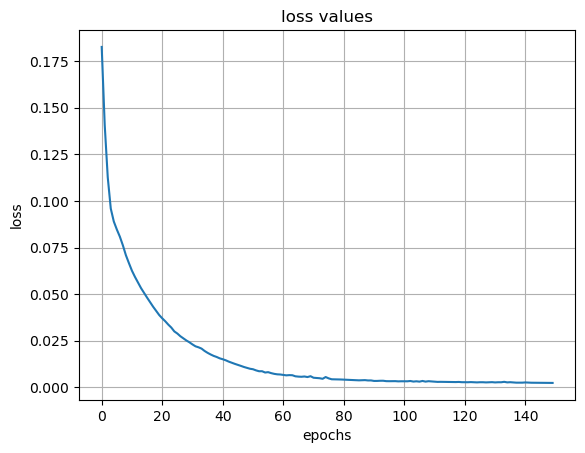

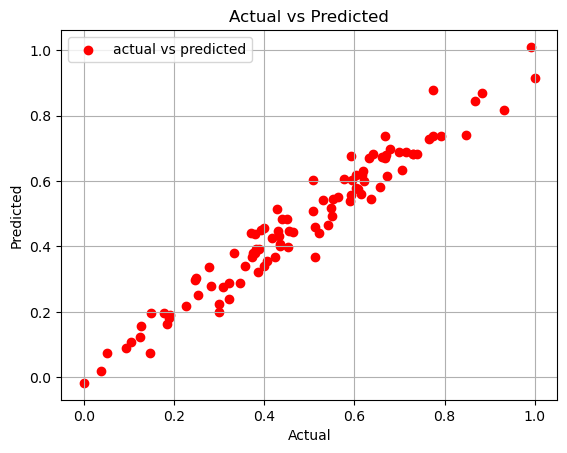

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
26.399737011402113


In [13]:
print(mileage(2.5, 111, 1234, 25))